## Ищем возможные точки начала репликации

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
f = open('./sequence.fasta')
f.readline()
sequence = ''
for line in f:
    sequence += line[:-1]


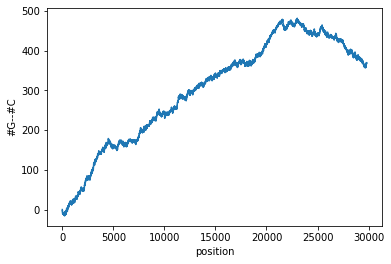

In [3]:
g_c = [0]
for i in sequence:
    if i == 'C':
        g_c.append(g_c[-1]-1)
    elif i == 'G':
        g_c.append(g_c[-1]+1)
    else:
        g_c.append(g_c[-1])

x = [i for i in range(len(sequence)+1)]
plt.plot(x,g_c)
plt.xlabel('position')
plt.ylabel('#G--#C')

plt.show()

Посмотрим поближе на начало

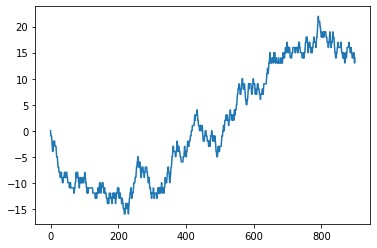

In [4]:
plt.plot([i for i in range(900)], g_c[:900])
plt.show()

Ищем частые 8- и 9-меры

In [5]:
from collections import OrderedDict

oric = sequence[:450]

def hamming_dist(w1,w2):
    out = abs(len(w1)-len(w2))
    for i in range(min(len(w1),len(w2))):
        if w1[i] != w2[i]:
            out += 1
    return out

def freq_pattern(pattern, dist):
    out = 0
    k = len(pattern)
    for i in range(len(oric)+1-k):
        s = oric[i:i+k]
        if hamming_dist(s,pattern)<dist:
            out += 1
    return out

def freq_map(k,dist):
    out = OrderedDict({})
    for i in range(len(oric)-k+1):
        s = oric[i:i+k]
        if s not in out:
            out[s] = freq_pattern(s, dist)
    return out

def most_freq_kmers(k,dist):
    fmap = freq_map(k,dist)
    flist = list(fmap.items())
    flist.sort(key = lambda i : -i[1])
    out = []
    i = 0
    while flist[i][1] == flist[0][1]:
        out.append(flist[i][0])
        i += 1
    out = [(out),flist[0][1]]
    return out

In [6]:
print(most_freq_kmers(8,2))
print(most_freq_kmers(9,2))
print()
print(most_freq_kmers(8,1))
print(most_freq_kmers(9,1))

[['AAACCAAC', 'AACCAACC', 'AACCAACT', 'TAATTAAT', 'TAATTACT', 'TCGTCCGT', 'CGTCCGTG', 'GTGGCTTT', 'TGTGGCTT', 'AACTTGAA'], 3]
[['TCGTCCGTG'], 3]

[['GGTTTCGT', 'GTTTCGTC', 'TTTCGTCC', 'TTCGTCCG'], 2]
[['GGTTTCGTC', 'GTTTCGTCC', 'TTTCGTCCG'], 2]
